In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('general_data.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [36]:
df = data
ec = LabelEncoder()
df['Attrition'] = ec.fit_transform(df['Attrition'])
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [37]:
#df['Attrition'] = pd.Categorical(df['Attrition'])
df.dtypes

Age                          int64
Attrition                    int32
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [38]:
df.corr()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.009730,-0.015111,NaN,-0.004729,-0.010290,-0.031176,0.042345,0.032533,NaN,-0.006839,-0.170338,-0.049431,-0.134392,-0.033019,-0.156199
DistanceFromHome,0.006963,-0.009730,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.015111,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.004729,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.010290,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.031176,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,0.042345,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.032533,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864


In [54]:
def printHypo(feature, r, p):
    print("H0:- There is no significant relationship between Attrition and ", feature)
    print("Ha:- There is significant relationship between Attrition and", feature, '\n\n')
    if p > 0.05:
        print("Since p (", p, ")is GREATER than 0.05 we accept the NULL hypothesis and reject the alternative hypothesis which means there is NO significant relationship between Attrition and ", feature)
    elif p <= 0.05:
        print("Since p (", p, ")is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and ", feature)
        if r > 0:
            print("There is POSITIVE, (", r, ") correlation between Attrition and ", feature, " which means, the more the ", feature, " the more the attrition")
        elif r < 0:
            print('There is NEGATIVE, {} correlation between Attrition and {} which means, the less the {} the more is the attrition'.format(r,feature, feature))
        elif r == 0:
            print("There is no correlation between Attrition and ", feature)

In [55]:
stats, p = pearsonr(df.Attrition, df.Age)
printHypo("Age", stats, p)

H0:- There is no significant relationship between Attrition and  Age
Ha:- There is significant relationship between Attrition and Age 


Since p ( 1.9968016158845057e-26 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  Age
There is NEGATIVE, -0.1592050068657796 correlation between Attrition and Age which means, the less the Age the more is the attrition


However, the correlation rate ranges from 0 to -0.2 which shows very low level of correlation between the two variables  

In [6]:
df['Gender'] = ec.fit_transform(df['Gender'])
df['Gender'] = pd.Categorical(df['Gender'])
print(df.head())
print(df.dtypes)

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51         0      Travel_Rarely                   Sales                 6   
1   31         1  Travel_Frequently  Research & Development                10   
2   32         0  Travel_Frequently  Research & Development                17   
3   38         0         Non-Travel  Research & Development                 2   
4   32         0      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  EmployeeID Gender  ...  \
0          2  Life Sciences              1           1      0  ...   
1          1  Life Sciences              1           2      0  ...   
2          4          Other              1           3      1  ...   
3          5  Life Sciences              1           4      1  ...   
4          1        Medical              1           5      1  ...   

   NumCompaniesWorked Over18 PercentSalaryHike  StandardHours  \
0                 1.0      

In [17]:
from scipy.stats import chi2_contingency
chitable = pd.crosstab(df.Attrition, df.Gender)
print(chitable)
stats, p, dof, expected = chi2_contingency(chitable)
print("chi2 method test stats: ", stats)
print("chi2 method p: ", p)
print("chi2 method dof: ", dof)
r_p, p_p = pearsonr(df.Attrition, df.Gender)
print('Pearson r: ', r_p)
print('Pearson p: ', p_p)

Gender        0     1
Attrition            
0          1494  2205
1           270   441
chi2 method test stats:  1.349904410246582
chi2 method p:  0.24529482862926827
chi2 method dof:  1
Pearson r:  0.018125078877010262
Pearson p:  0.22881970951768318




H0 :- There is no significant relationship between Attrition and Gender
Ha :- There is significant relationship between Attrition and Gender

Since the p value 0.24 > 0.05 we accept the null hypothesis which states there is no significant relationship between Attrition and Gender. 
Also, the test statistics is 1.34 and the boundary the table value is 3.84. Hence we accept the null hypothesis. 

In [43]:
r, p = pearsonr(df.Attrition, df.MonthlyIncome)
printHypo("Monthly Income",r, p)

H0:- There is no significant relationship between Attrition and  Monthly Income
Ha:- There is significant relationship between Attrition and Monthly Income 


Since p ( 0.038427484905971684 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  Monthly Income
There is NEGATIVE, -0.031176281698115017 correlation between Attrition and Monthly Income which means, the less the Monthly Income the more is the attrition



H0 :- There is no significant relationship between Attrition and Monthly Income
Ha :- There is significant relationship between Attrition and Monthly Income
Since p value, -0.03 < 0.05 we reject the null hypothesis.
The r value is 0.03 which is < 0.2 which means there is weak correlation between Attrition and Monthly Income

In [47]:
df.fillna(method='pad', inplace=True)
df.isna().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
EmployeeID                 0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [48]:
r, p = pearsonr(df.Attrition, df.TotalWorkingYears)
printHypo('TotalWorkingYears', r, p)

H0:- There is no significant relationship between Attrition and  TotalWorkingYears
Ha:- There is significant relationship between Attrition and TotalWorkingYears 


Since p ( 8.007080895357331e-30 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  TotalWorkingYears
There is NEGATIVE, -0.16962158243861822 correlation between Attrition and TotalWorkingYears which means, the less the TotalWorkingYears the more is the attrition


In [49]:
r, p = pearsonr(df.Attrition, df.YearsAtCompany)
printHypo('YearsAtCompany', r, p)

H0:- There is no significant relationship between Attrition and  YearsAtCompany
Ha:- There is significant relationship between Attrition and YearsAtCompany 


Since p ( 3.16388312248436e-19 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  YearsAtCompany
There is NEGATIVE, -0.13439221398997717 correlation between Attrition and YearsAtCompany which means, the less the YearsAtCompany the more is the attrition


In [50]:
r, p = pearsonr(df.Attrition, df.YearsWithCurrManager)
printHypo('YearsWithCurrManager', r, p)

H0:- There is no significant relationship between Attrition and  YearsWithCurrManager
Ha:- There is significant relationship between Attrition and YearsWithCurrManager 


Since p ( 1.7339322652874626e-25 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  YearsWithCurrManager
There is NEGATIVE, -0.15619931590162842 correlation between Attrition and YearsWithCurrManager which means, the less the YearsWithCurrManager the more is the attrition


In [58]:
r, p = pearsonr(df.Attrition, df.PercentSalaryHike)
printHypo('PercentSalaryHike', r, p)

H0:- There is no significant relationship between Attrition and  PercentSalaryHike
Ha:- There is significant relationship between Attrition and PercentSalaryHike 


Since p ( 0.030743386433316814 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  PercentSalaryHike
There is POSITIVE, ( 0.032532594891053514 ) correlation between Attrition and  PercentSalaryHike  which means, the more the  PercentSalaryHike  the more the attrition


In [57]:
r, p = pearsonr(df.Attrition, df.NumCompaniesWorked)
printHypo('NumCompaniesWorked', r, p)

H0:- There is no significant relationship between Attrition and  NumCompaniesWorked
Ha:- There is significant relationship between Attrition and NumCompaniesWorked 


Since p ( 0.0055705283151114855 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  NumCompaniesWorked
There is POSITIVE, ( 0.04173639112117232 ) correlation between Attrition and  NumCompaniesWorked  which means, the more the  NumCompaniesWorked  the more the attrition


In [56]:
r, p = pearsonr(df.Attrition, df.EmployeeID)
printHypo('EmployeeID', r, p)

H0:- There is no significant relationship between Attrition and  EmployeeID
Ha:- There is significant relationship between Attrition and EmployeeID 


Since p ( 0.753548740189224 )is GREATER than 0.05 we accept the NULL hypothesis and reject the alternative hypothesis which means there is NO significant relationship between Attrition and  EmployeeID


In [59]:
r, p = pearsonr(df.Attrition, df.JobLevel)
printHypo('JobLevel', r, p)

H0:- There is no significant relationship between Attrition and  JobLevel
Ha:- There is significant relationship between Attrition and JobLevel 


Since p ( 0.4945171727200731 )is GREATER than 0.05 we accept the NULL hypothesis and reject the alternative hypothesis which means there is NO significant relationship between Attrition and  JobLevel


In [60]:
r, p = pearsonr(df.Attrition, df.StockOptionLevel)
printHypo('StockOptionLevel', r, p)

H0:- There is no significant relationship between Attrition and  StockOptionLevel
Ha:- There is significant relationship between Attrition and StockOptionLevel 


Since p ( 0.6498072937492487 )is GREATER than 0.05 we accept the NULL hypothesis and reject the alternative hypothesis which means there is NO significant relationship between Attrition and  StockOptionLevel


In [61]:
r, p = pearsonr(df.Attrition, df.TrainingTimesLastYear)
printHypo('TrainingTimesLastYear', r, p)

H0:- There is no significant relationship between Attrition and  TrainingTimesLastYear
Ha:- There is significant relationship between Attrition and TrainingTimesLastYear 


Since p ( 0.0010247061915349563 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  TrainingTimesLastYear
There is NEGATIVE, -0.04943057624425504 correlation between Attrition and TrainingTimesLastYear which means, the less the TrainingTimesLastYear the more is the attrition


In [62]:
r, p = pearsonr(df.Attrition, df.YearsSinceLastPromotion)
printHypo('YearsSinceLastPromotion', r, p)

H0:- There is no significant relationship between Attrition and  YearsSinceLastPromotion
Ha:- There is significant relationship between Attrition and YearsSinceLastPromotion 


Since p ( 0.02833033618936241 )is LESS than 0.05 we reject the null hypothesis and accept the ALTERNATIVE hypothesis which means there is significant relationship between Attrition and  YearsSinceLastPromotion
There is NEGATIVE, -0.03301877514258439 correlation between Attrition and YearsSinceLastPromotion which means, the less the YearsSinceLastPromotion the more is the attrition


In [63]:
r, p = pearsonr(df.Attrition, df.DistanceFromHome)
printHypo('DistanceFromHome', r, p)

H0:- There is no significant relationship between Attrition and  DistanceFromHome
Ha:- There is significant relationship between Attrition and DistanceFromHome 


Since p ( 0.5182860428065224 )is GREATER than 0.05 we accept the NULL hypothesis and reject the alternative hypothesis which means there is NO significant relationship between Attrition and  DistanceFromHome


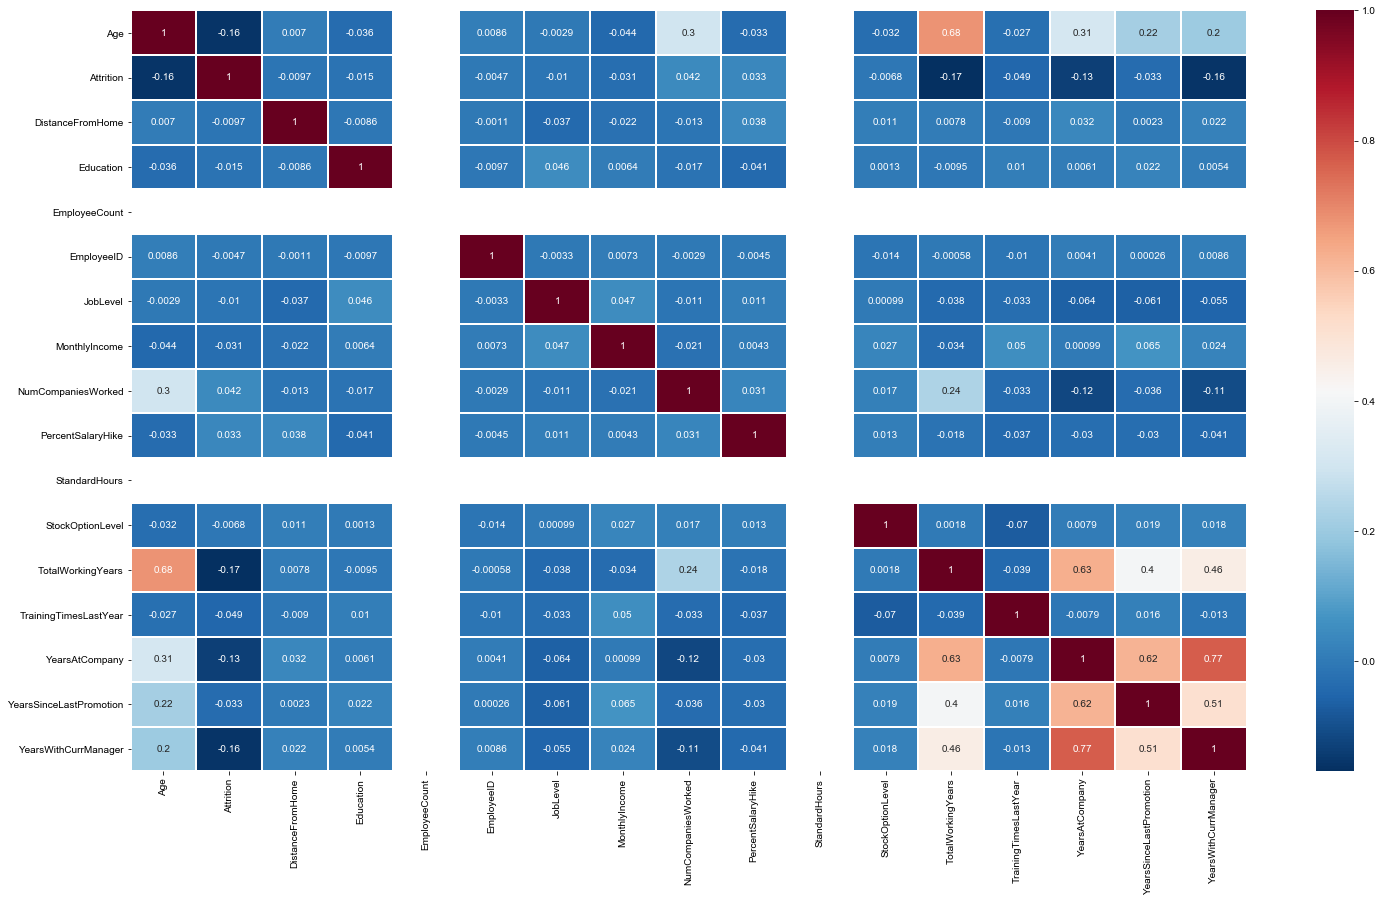

In [65]:
#Visualise the Corrleation
pearsoncorr = df.corr(method = 'pearson')
plt.figure(figsize=(25,14))
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=1.0)
sns.set(font_scale=3)